In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

array([[ -2,   2,   0,   0,   0,   0,   0,   0],
       [ -2,   0,   2,   0,   0,   0,   0,   0],
       [  0,  -5,   0,   5,   0,   0,   0,   0],
       [  0,  -5,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, -11,  11,   0,   0],
       [  0,   0,   0,   0, -11,   0,  11,   0],
       [  0,   0,   0,   0,   0, -14,   0,  14],
       [  0,   0,   0,   0,   0, -14,   0,   0]], dtype=int8)

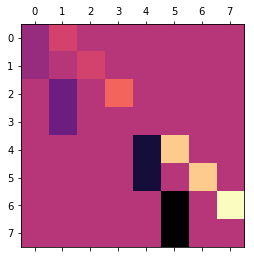

In [8]:
def build_band_M(normals):
    h, w = normals.shape[0] - 1, normals.shape[1] - 1
    n = w * h
    M = np.zeros((2*n, 2*n), dtype=np.int8)
    v = np.zeros(2*n, dtype=np.int8)
    
   
    for i in range(h):
        for j in range(w):
            k = (i*w + j)*2
            nx, ny, nz = normals[i][j]
            
            # v1
            if j == 0:
                M[k][k] = -nz
                M[k][k + 1] = nz
            else:
                M[k][k - 1] = -nz
                M[k][k + 1] = nz

            # v2
            if j == 0:
                M[k + 1][k] = -nz
                if j != w - 1:
                    M[k + 1][k + 2] = nz
            else:
                M[k + 1][k - 1] = -nz
                if j != w - 1:
                    M[k + 1][k + 2] = nz
                
            
    return M, v

w, h = 3, 3
normals = np.arange(w * h * 3).reshape(h, w, 3)
M, v = build_band_M(normals)
plt.matshow(M, cmap=plt.cm.magma)
M

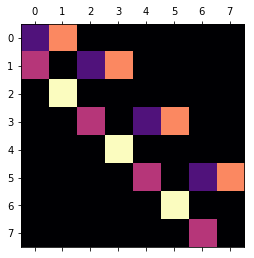

In [24]:
plt.matshow(M.T, cmap=plt.cm.magma)

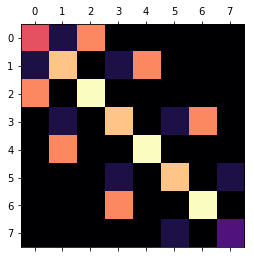

In [25]:
A = np.matmul(M.T, M)
plt.matshow(A, cmap=plt.cm.magma)